<a href="https://colab.research.google.com/github/Marins14/ECM514-EDA_Dengue/blob/main/IMT_Projeto_B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Casos de dengue na cidade de SP

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Jonathan Martins Gomes, 20.00862-7' #@param {type:"string"}
Aluno2 = 'Matheus Marins Bernardello, 20.00286-6' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}





# **Resumo (*Abstract*)**

Esta análise exploratória tem como objetivo entender a distribuição e os padrões dos casos de dengue ao longo do tempo em diferentes municípios, utilizando dados epidemiológicos detalhados. A análise abrange a identificação de tendências, distribuição dos casos por semanas epidemiológicas, correlações com fatores climáticos e identificação dos municípios com maior número de casos. Os pontos obtidos podem orientar ações de saúde pública e estratégias de controle da dengue.


# **Introdução**

A dengue é uma doença viral transmitida pelo mosquito Aedes aegypti, que representa um sério problema de saúde pública em várias regiões do mundo, incluindo o Brasil. A compreensão dos padrões de incidência da dengue, assim como a relação entre fatores ambientais e a proliferação do mosquito, é essencial para a implementação de medidas eficazes de controle e prevenção.

Esta análise exploratória de dados (EDA) utiliza informações de casos de dengue coletadas de fontes confiáveis para examinar a evolução da doença ao longo do tempo, identificar períodos críticos de surto e explorar possíveis correlações com fatores climáticos como temperatura e umidade.


# **Descrição e origem dos dados**

Os dados utilizados nesta análise foram obtidos de duas fontes principais:

- Centro de Vigilância Epidemiológica "Prof. Alexandre Vranjac" (CVE): Esta fonte fornece dados epidemiológicos detalhados sobre a incidência de dengue em diferentes regiões.
- InfoDengue: Uma plataforma que oferece dados atualizados sobre a dengue, incluindo informações sobre a incidência da doença e fatores climáticos associados.

Os conjuntos de dados incluem informações sobre o número de casos de dengue por semana epidemiológica, dados climáticos como temperatura média e umidade, e detalhes sobre a incidência da doença em diferentes municípios.

- dengue_1-22.csv
  - Contém dados de casos de dengue e fatores climáticos por semana epidemiológica.
  - Principais colunas: data_iniSE, SE, casos, tempmed, umidmed, entre outras.

- dengue24_se.xlsx e dengue23_se.xlsx
  - Contêm dados de casos de dengue por município e por semana epidemiológica para os anos de 2023 e 2024.
  - Principais colunas: DRS, GVE, RS, MUNICÍPIO DE RESIDÊNCIA, SE 01, SE 02, ..., Total.







# **Aquisição e Preparação dos dados**






In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dengue_1_22 = pd.read_csv('https://raw.githubusercontent.com/Marins14/ECM514-EDA_Dengue/main/dengue_1-22.csv')
dengue24_se = pd.read_csv('https://raw.githubusercontent.com/Marins14/ECM514-EDA_Dengue/main/dengue24_se.csv')
dengue23_se = pd.read_csv('https://raw.githubusercontent.com/Marins14/ECM514-EDA_Dengue/main/dengue23_se.csv')

dengue_1_22.head()
dengue24_se.head()
dengue23_se.head()

,DRS,GVE,RS,MUNICÍPIO DE RESIDÊNCIA,SE 01,SE 02,SE 03,SE 04,SE 05,SE 06,...,SE 44,SE 45,SE 46,SE 47,SE 48,SE 49,SE 50,SE 51,SE 52,Total
0,Marília,MARÍLIA,ADAMANTINA,Adamantina,94.0,97.0,121.0,139.0,187.0,158.0,...,0.0,1.0,3.0,5.0,0.0,1.0,2.0,1.0,0.0,3356.0
1,São José do Rio Preto,SÃO JOSÉ DO RIO PRETO,JOSÉ BONIFÁCIO,Adolfo,0.0,2.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
2,São João da Boa Vista,SÃO JOÃO DA BOA VISTA,MANTIQUEIRA,Aguaí,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
3,São João da Boa Vista,SÃO JOÃO DA BOA VISTA,MANTIQUEIRA,Águas da Prata,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0
4,Campinas,CAMPINAS,CIRCUITO DAS AGUAS,Águas de Lindóia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


# **Análises**



## **Q1. Pergunta 1.** Qual é a tendência dos casos de dengue ao longo do tempo?



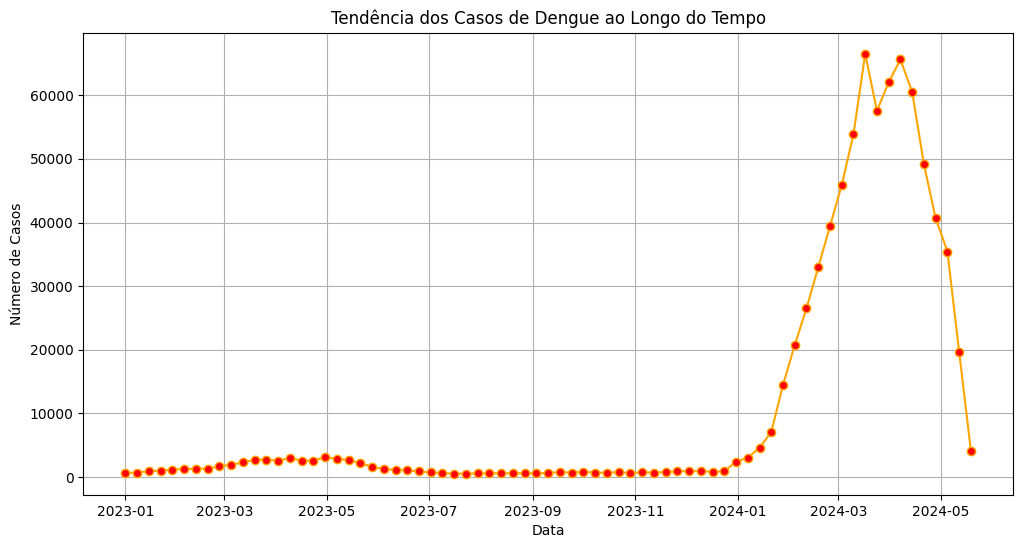

In [ ]:
# Converter a data de inicio para um formato de date_time
dengue_1_22['data_iniSE'] = pd.to_datetime(dengue_1_22['data_iniSE'])

# Plotar as datas de inicio dos casos de dengue
plt.figure(figsize=(12, 6))
plt.plot(dengue_1_22['data_iniSE'], dengue_1_22['casos'], marker='o', linestyle='-', c='orange',mfc='red')
plt.title('Tendência dos Casos de Dengue ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()


### **Conclusão**
### É possível observar uma tendência crescente de casos de dengue ao longo do tempo, o que é reforçado ao recente surto de dengue no começo do ano de 2024, o que é demonstrado no gráfico.

## **Q2. Pergunta 2.** Qual é a distribuição dos casos de dengue por semana e é possível determinar se a Dengue apresenta comportamento sazonal?



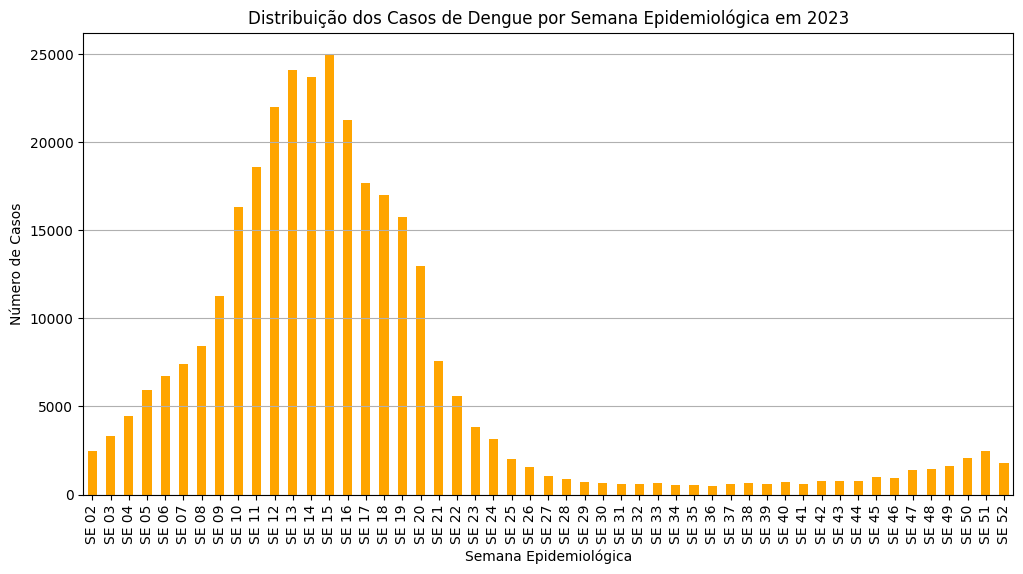

In [ ]:
# Extraindo a data de 2023
dengue_2023 = dengue23_se.iloc[:, 5:-1].sum()

# Reaizando o histograma
plt.figure(figsize=(12, 6))
dengue_2023.plot(kind='bar' , color= 'orange')
plt.title('Distribuição dos Casos de Dengue por Semana Epidemiológica em 2023')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Número de Casos')
plt.grid(axis='y')
plt.show()

### **Conclusão**

### A distribuição dos casos de por semana epidemiológica mostra que a dengue é uma doença sazonal e o número de casos está intimamente relacionado a época do ano conforme o gráfico deixa explicíto, a semana 06 até a semana 21 ocorre o aumento drástico de casos.


## **Q3. Pergunta 3.** Existe correlação entre os casos de dengue e a temperatura média semanal?

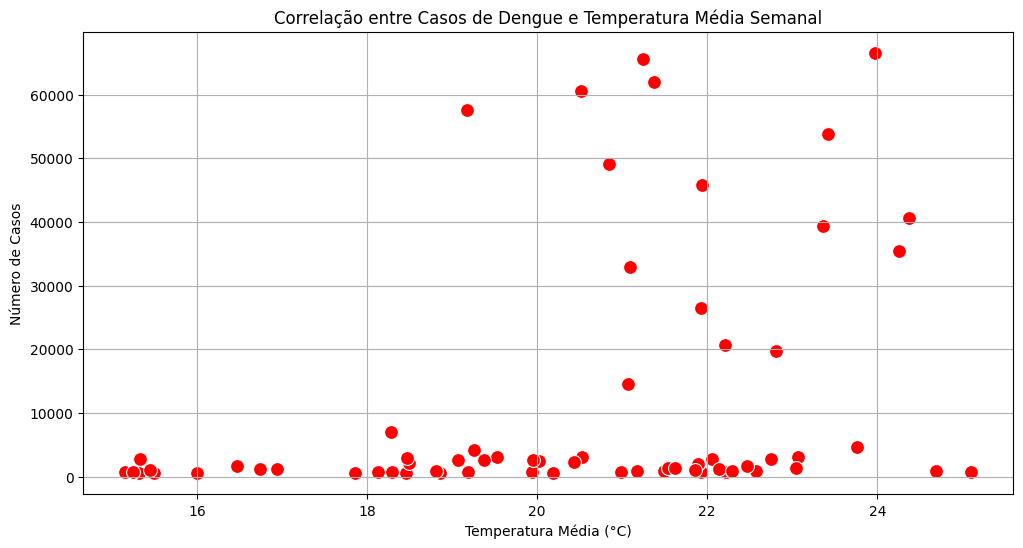

In [ ]:
# Realizando a análise com o gráfico de pontos para analisar correlação
plt.figure(figsize=(12, 6))
sns.scatterplot(data = dengue_1_22, x = 'tempmed', y='casos',color='red',s=100)

plt.title('Correlação entre Casos de Dengue e Temperatura Média Semanal')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

### **Conclusão**
### Embora o gráfico de correlação não demonstre um comportamento de relação forte entre as variáveis é possível notar que os dias que ocorrem os maiores números de casos, são dias em que a temperatura média está acima dos 20ºC, isto pode estar associado ao um aumento no numero de casos.

## **Q4. Pergunta 4.** Houve mudanças em municípios que apresentam o maior número de casos acumulados de dengue em 2023 e 2024?

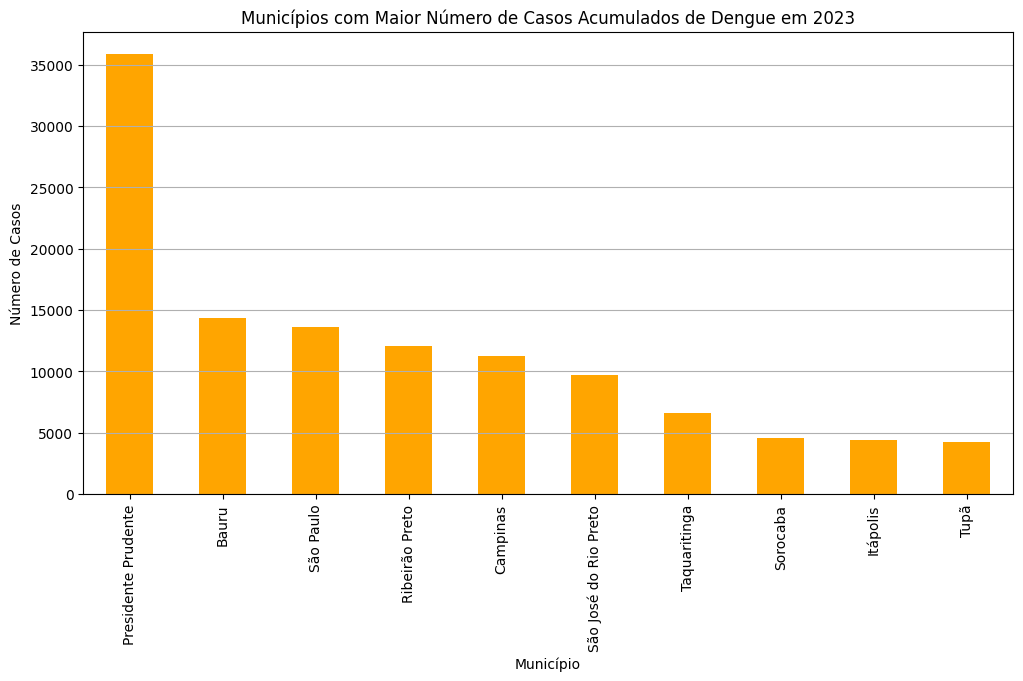

In [ ]:
# Extraindo os municipios da tabela de 2023
total_cases_2023 = dengue23_se.groupby('MUNICÍPIO DE RESIDÊNCIA')['Total'].sum().sort_values(ascending=False).head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
total_cases_2023.plot(kind='bar', color='orange')
plt.title('Municípios com Maior Número de Casos Acumulados de Dengue em 2023')
plt.xlabel('Município')
plt.ylabel('Número de Casos')
plt.grid(axis='y')
plt.show()


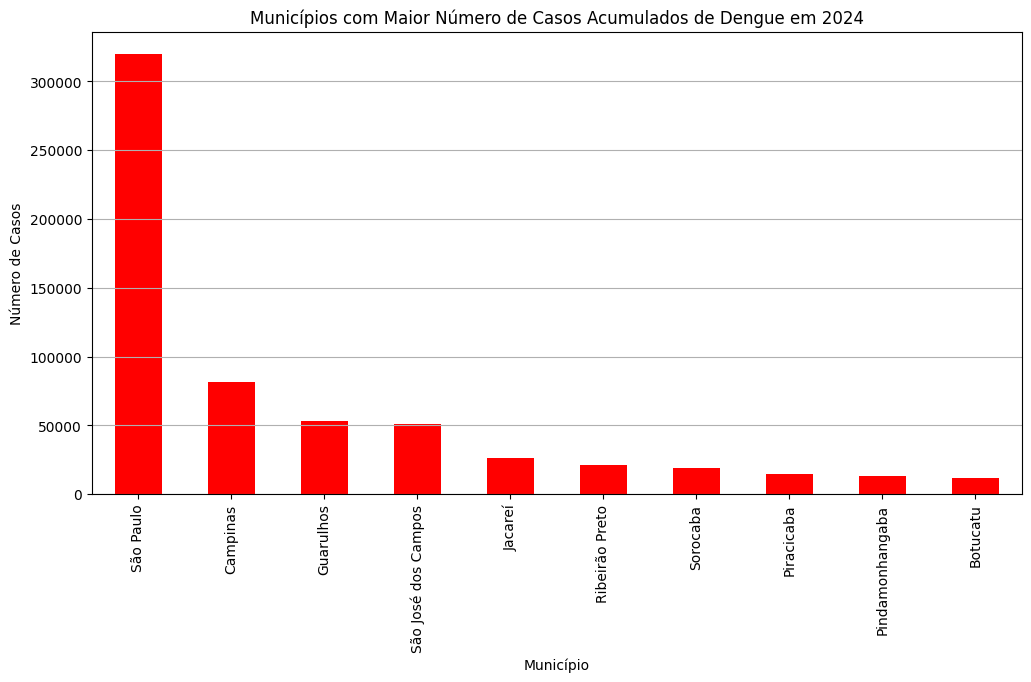

In [ ]:
# Extraindo os dados de municipio de 2024
total_cases_2024 = dengue24_se.groupby('MUNICÍPIO DE RESIDÊNCIA')['Total'].sum().sort_values(ascending=False).head(10)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
total_cases_2024.plot(kind='bar',color='red')
plt.title('Municípios com Maior Número de Casos Acumulados de Dengue em 2024')
plt.xlabel('Município')
plt.ylabel('Número de Casos')
plt.grid(axis='y')
plt.show()

### **Conclusão**
### Houve mudanças significativas de municípios com maior número de casos entre os anos:
  - São Paulo: em 2023 número de casos abaixo dos 15000 casos,
já em 2024 número de casos acima dos 300000 casos.
  - Campinas foi de quinto lugar para segundo lugar, indo de menos de 15000 para mais de 50000 casos.
  - Guarulhos em 2023 não teve números expressivos de casos já em 2024 ele ultrapassou os 50000 casos.

## **Q5. Pergunta 5.** Como a umidade média semanal afeta o número de casos de dengue?

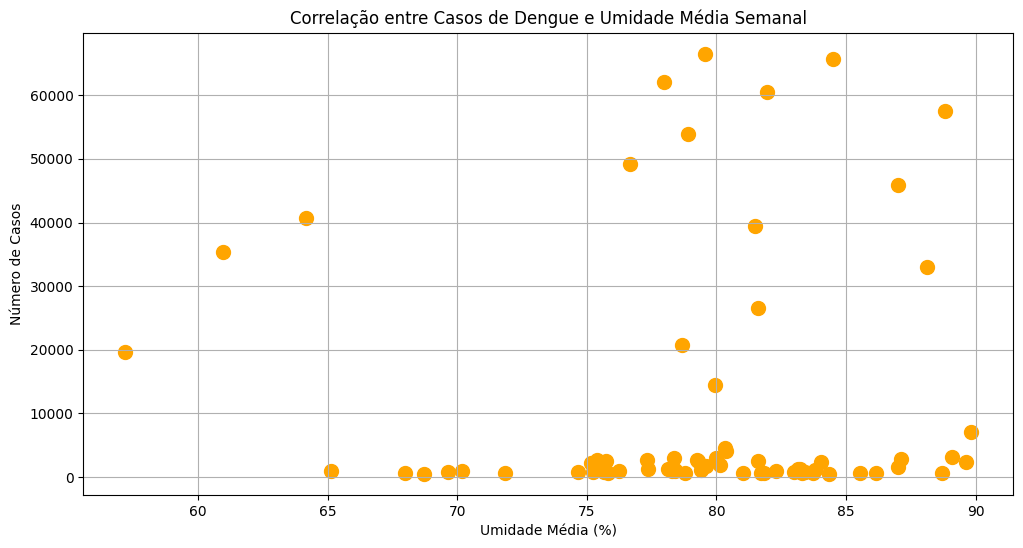

In [ ]:
#Plotando o gráfico de pontos
plt.figure(figsize=(12, 6))
plt.scatter(dengue_1_22['umidmed'], dengue_1_22['casos'], alpha=1,color='orange',s=100)
plt.title('Correlação entre Casos de Dengue e Umidade Média Semanal')
plt.xlabel('Umidade Média (%)')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()


### **Conclusão**

### Embora o gráfico de correlação não demonstre um comportamento de relação forte entre as variáveis é possível notar que os dias que ocorrem os maiores numeros de casos, são dias em que a umidade média está acima dos 75%, isto pode estar associado ao um aumento no número de casos.

# **Referências**

- [Info Dengue](https://info.dengue.mat.br/services/api)
- [CVE - Centro de Vigilância Epidemiológica "Prof. Alexandre Vranjac](https://saude.sp.gov.br/cve-centro-de-vigilancia-epidemiologica-prof.-alexandre-vranjac/oldzoonoses/dengue/dados-estatisticos)

# **Conclusão**

A análise dos dados de dengue trouxe à tona alguns padrões importantes que podem ajudar a guiar políticas públicas e intervenções de saúde. Ao observarmos as tendências ao longo do tempo, a relação com o clima e identificarmos quais municípios precisam de mais atenção, podemos desenvolver estratégias mais eficazes para controlar e prevenir a dengue. Tomar decisões com base em dados concretos é crucial para diminuir os casos da doença e garantir a saúde da população.



# **Apêndice: Vídeo, GitHub e Datafólio**


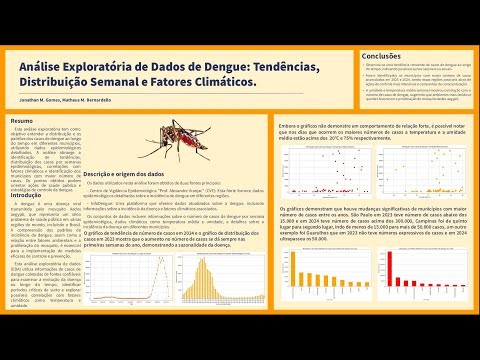

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('QCZ5Wim4CV0')

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,Jonathan Martins Gomes,20.00862-7,7.9
1,Matheus Marins Bernardello,20.00286-6,7.9
